In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math as math
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import sklearn

In [3]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
try:
    df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='utf-8')
except UnicodeDecodeError:
    df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='ISO-8859-1')

# df = pd.read_csv('/content/drive/MyDrive/spam.csv', encoding='utf-8', errors='replace')

In [7]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3417,spam,LIFE has never been this much fun and great un...,NaN,NaN,NaN
1454,ham,Can Ì_ all decide faster cos my sis going home...,NaN,NaN,NaN
5198,ham,She.s fine. I have had difficulties with her p...,NaN,NaN,NaN
4272,ham,Kind of. Just missed train cos of asthma attac...,NaN,NaN,NaN
447,ham,I wont get concentration dear you know you are...,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

cleaning

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

In [11]:
df.rename(columns = {'v1' : 'target', 'v2' : 'message'}, inplace = True)
df.sample(5)

,target,message
2306,ham,"Aight that'll work, thanks"
3049,ham,Ok
2144,spam,FreeMsg: Hey - I'm Buffy. 25 and love to satis...
4204,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...
1660,ham,No just send to you. Bec you in temple na.


In [12]:
df['target'] = encoder.fit_transform(df['target'])
df.head()

,target,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
df.duplicated().sum()

403

In [14]:
df = df.drop_duplicates(keep = 'first')

EDA

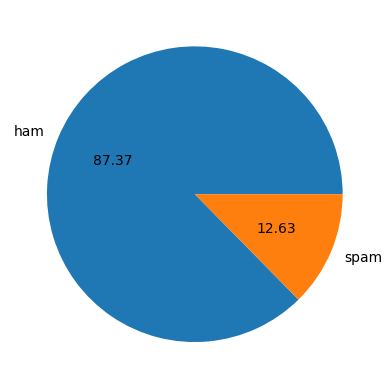

In [15]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [16]:
import nltk

In [17]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [18]:
df['num_chars'] = df['message'].apply(len)

In [19]:
df.head()

,target,message,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [20]:
df['num_words'] = df['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [21]:
df['num_sentences'] = df['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [22]:
df.head()

,target,message,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [23]:
df[['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
df[df['target'] == 0][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [25]:
df[df['target'] == 1][['num_chars', 'num_words', 'num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [26]:
import seaborn as sns

<Axes: xlabel='num_chars', ylabel='Count'>

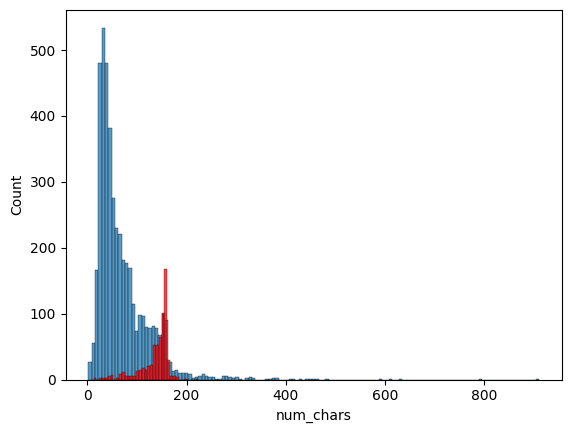

In [27]:
sns.histplot(df[df['target'] == 0]['num_chars'])
sns.histplot(df[df['target'] == 1]['num_chars'], color = 'red')

<Axes: xlabel='num_words', ylabel='Count'>

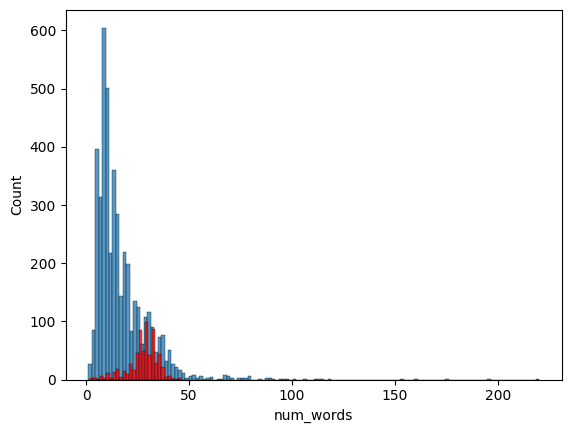

In [28]:
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'], color = 'red')

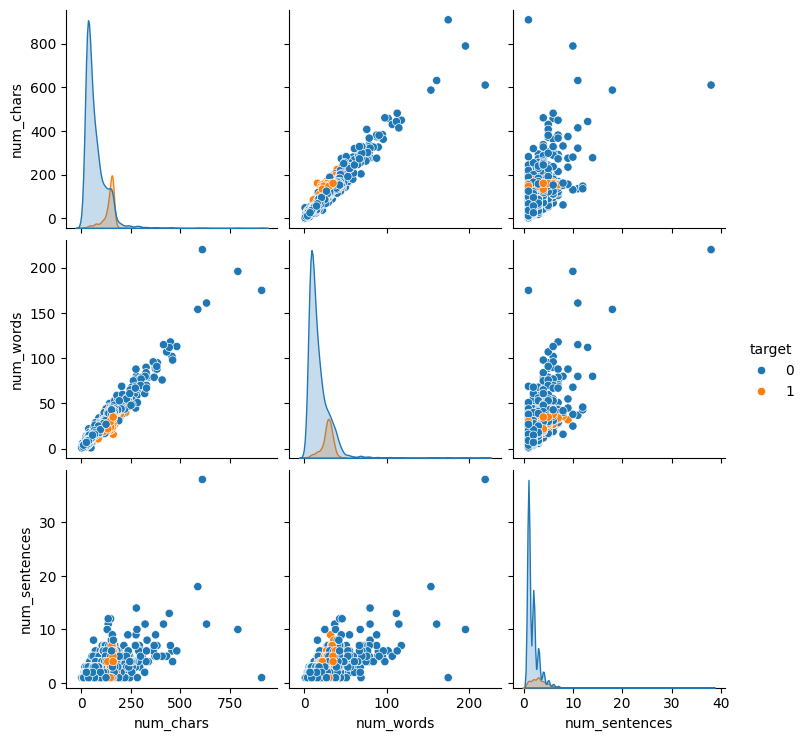

In [29]:
sns.pairplot(df, hue = 'target')

<Axes: >

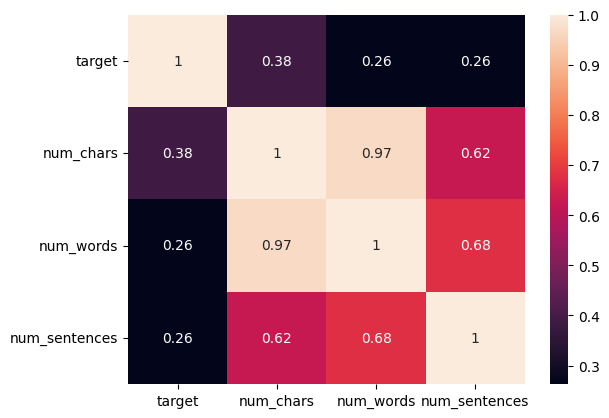

In [30]:
sns.heatmap(df[['target', 'num_chars', 'num_words', 'num_sentences']].corr(), annot = True)

DATA PROCESSING

In [40]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [42]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [43]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []

  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [44]:
transform_text("do you like my presentation on ML?")

'like present ml'

In [45]:
df['transformed_text'] = df['message'].apply(transform_text)

In [46]:
from wordcloud import WordCloud
wc = WordCloud(width = 500, height = 500, min_font_size = 10, background_color = 'white')

In [47]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep = " "))

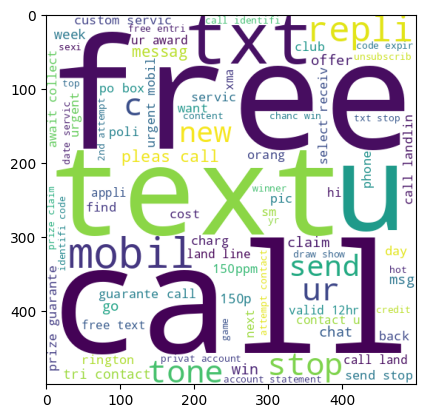

In [48]:
plt.imshow(spam_wc)
plt.show()

In [49]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep = " "))

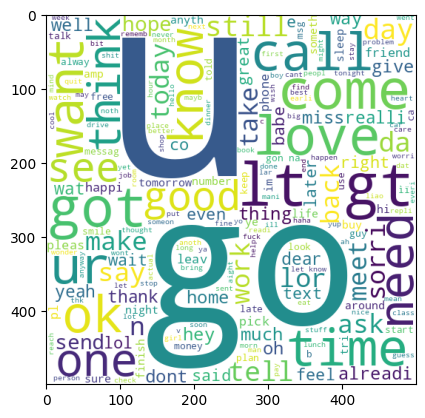

In [50]:
plt.imshow(ham_wc)
plt.show()

In [51]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
  for word in msg.split():
    spam_corpus.append(word)


In [52]:
print(len(spam_corpus))

9939


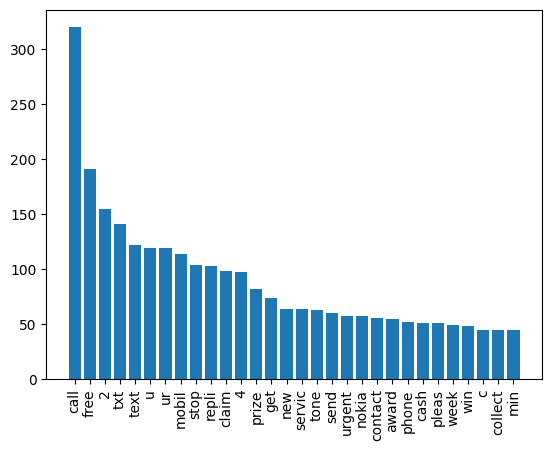

In [53]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

In [54]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
  for word in msg.split():
    ham_corpus.append(word)


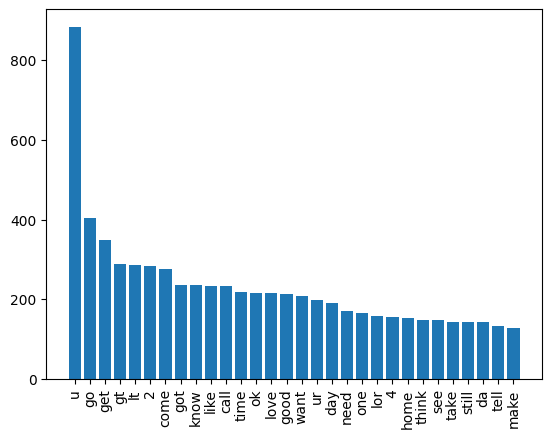

In [55]:
from collections import Counter
plt.bar(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation = 'vertical')
plt.show()

MODEL

In [109]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features = 3000)

In [110]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

In [112]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 2, test_size = 0.2)

In [113]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [114]:
gnb.fit(X_train, y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test, y_pred1))
print(confusion_matrix(y_test, y_pred1))
print(precision_score(y_test, y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [115]:
mnb.fit(X_train, y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test, y_pred2))
print(confusion_matrix(y_test, y_pred2))
print(precision_score(y_test, y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [116]:
bnb.fit(X_train, y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test, y_pred3))
print(confusion_matrix(y_test, y_pred3))
print(precision_score(y_test, y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [117]:
#using Tfidf -> MNB

In [118]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [119]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [120]:
clfs = {
    'SVC' : svc,
    'KN' : knc,
    'NB': mnb,
    'DT': dtc,
    'LR': lrc,
    'RF': rfc,
    'AdaBoost': abc,
    'BgC': bc,
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [121]:
def train(clf, X_train, y_train, X_test, y_test):
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  acc = accuracy_score(y_test, y_pred)
  prec = precision_score(y_test, y_pred)

  return acc, prec

In [102]:
accuracy_scores = []
precision_scores = []

for name, clf in clfs.items():
  acc, prec = train(clf, X_train, y_train, X_test, y_test)

  print('For ', name)
  print('Accuracy ', acc)
  print('Precision ', prec)

  accuracy_scores.append(acc)
  precision_scores.append(prec)

For  SVC
Accuracy  0.9729206963249516
Precision  0.9741379310344828
For  KN
Accuracy  0.9003868471953579
Precision  1.0
For  NB
Accuracy  0.9593810444874274
Precision  1.0
For  DT
Accuracy  0.9361702127659575
Precision  0.8461538461538461
For  LR
Accuracy  0.9516441005802708
Precision  0.94
For  RF
Accuracy  0.971953578336557
Precision  1.0
For  AdaBoost
Accuracy  0.9613152804642167
Precision  0.9454545454545454
For  BgC
Accuracy  0.9584139264990329
Precision  0.8625954198473282
For  ETC
Accuracy  0.9729206963249516
Precision  0.9824561403508771
For  GBDT
Accuracy  0.9526112185686654
Precision  0.9238095238095239
For  xgb
Accuracy  0.9729206963249516
Precision  0.9435483870967742


In [123]:
accuracy_scores_mf_3000 = []
precision_scores_mf_3000 = []

for name, clf in clfs.items():
  acc, prec = train(clf, X_train, y_train, X_test, y_test)

  print('For ', name)
  print('Accuracy ', acc)
  print('Precision ', prec)

  accuracy_scores_mf_3000.append(acc)
  precision_scores_mf_3000.append(prec)

For  SVC
Accuracy  0.9758220502901354
Precision  0.9747899159663865
For  KN
Accuracy  0.9052224371373307
Precision  1.0
For  NB
Accuracy  0.9709864603481625
Precision  1.0
For  DT
Accuracy  0.9332688588007737
Precision  0.8415841584158416
For  LR
Accuracy  0.9584139264990329
Precision  0.9702970297029703
For  RF
Accuracy  0.9758220502901354
Precision  0.9829059829059829
For  AdaBoost
Accuracy  0.960348162475822
Precision  0.9292035398230089
For  BgC
Accuracy  0.9584139264990329
Precision  0.8682170542635659
For  ETC
Accuracy  0.9748549323017408
Precision  0.9745762711864406
For  GBDT
Accuracy  0.9468085106382979
Precision  0.9191919191919192
For  xgb
Accuracy  0.9671179883945842
Precision  0.9262295081967213


In [106]:
performance = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy' : accuracy_scores, 'Precision' : precision_scores}).sort_values('Precision', ascending = False)

In [125]:
t = pd.DataFrame({'Algorithm' : clfs.keys(), 'Accuracy_Imp' : accuracy_scores_mf_3000, 'Precision_Imp' : precision_scores_mf_3000}).sort_values('Precision_Imp', ascending = False)

In [126]:
performance.merge(t, on = 'Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_Imp,Precision_Imp
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217
